<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Une-première-approche-" data-toc-modified-id="-Une-première-approche--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Une première approche </a></span></li><li><span><a href="#-Premiers-traitements-" data-toc-modified-id="-Premiers-traitements--2"><span class="toc-item-num">2&nbsp;&nbsp;</span> Premiers traitements </a></span></li><li><span><a href="#-Prolongements-:-recherche-de-traitements-" data-toc-modified-id="-Prolongements-:-recherche-de-traitements--3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Prolongements : recherche de traitements </a></span></li></ul></div>

<h2> Une première approche </h2>

L'image fleur.jpg  se situe dans le même dossier que le fichier de travail.

In [5]:
import PIL
print(PIL.__version__)

5.4.1


In [6]:
from PIL import Image #Importance de ce sous-package

from matplotlib.pyplot import imshow # pour voir l'image dans la cellule
import numpy as np

Il est intéressant d'utiliser une variable qui recueille le nom de l'image et une autre pour l'extension. Il suffira ensuite de les modifier pour travailler sur une autre image, éventuellement d'un autre format. Les formats les plus courants sont le JPEG (.jpg), le PNG (.png) ou le BMP (.bmp).

In [7]:
fichier="fleur"
ext=".jpg"

In [8]:
im1 = Image.open(fichier+ext) #ouvre l'image 

In [5]:
print(np.array(im1)[0,0]) # affiche la valeur du pixel en haut à gauche

[152 166 104]


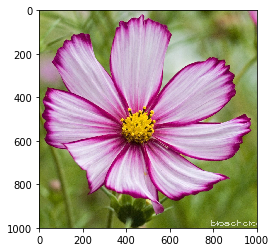

In [6]:
# Cellule pour voir l'image dans la cellule

imshow(np.array(im1))

In [6]:
L,H = im1.size #récupère la largeur et la hauteur de l'image

In [7]:
print(L,H) #pour vérifier que ça fonctionne !

1000 1000


Les dimensions de l'image sont essentielles pour la traiter. Le moindre téléphone portable produit aujourd'hui des images beaucoup trop "grosses" pour être utiliser sur l'Internet. 
Nous pouvons redimensionner une image en utilisant le methode resize.

512 384


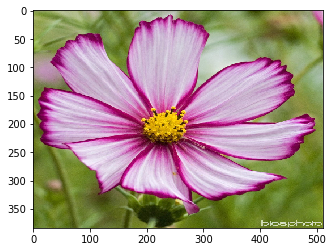

In [8]:

im1=im1.resize((512,384))
imshow(np.array(im1))
L,H = im1.size
print(L,H)

Nous allons tout d'abord créer une deuxième image ayant les mêmes dimensions que la première.

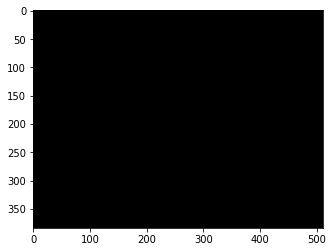

In [9]:
im2 = Image.new("RGB",(L,H))
imshow(np.array(im2))

On peut alors utiliser une double boucle "for" ou "while" pour parcourir la totalité de la première image et la recouper pixel par pixel dans la deuxième image. Si on utilise "while", penser à vérifier que la boucle s'arrête un jour !

In [10]:
i=0
while i<L:
    j=0
    while j<H :
        (rouge,vert,bleu)=im1.getpixel((i,j))
        im2.putpixel((i,j),(rouge,vert,bleu))
        j=j+1
    i=i+1

"getpixel" renvoie les trois composantes de chaque pixel de im1. "putpixel" effecte ces trois composantes au pixel correspondant de im2.
Pour vérifier que ce programme ne sert à rien, on peut alors afficher les deux images.

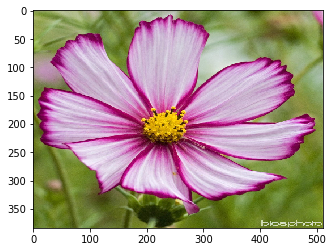

In [11]:
imshow(np.array(im1))
imshow(np.array(im2))

im2.save('fleur2','png')

Vous avez compris que ce programme ne sert à rien...pour le moment, mais qu'il offre une bonne base de travail pour traiter la première image (im1) en en créant une seconde (im2). Notons que chaque pixel de l'image est repéré par ses coordonnées (i,j), le premier pixel en haut à gauche est le point de coordonnées (0,0) de dernier en bas à droite est le point de coordonnées (L-1,H-1), le i indique la colonne où se trouve de pixel (et le j donne la ligne).

<h2> Premiers traitements </h2>

Une première tentavive peut consister à remplacer la ligne im2.putpixel((i,j),(rouge,vert,bleu)) par la ligne im2.putpixel((i,j),(bleu,rouge,vert)).

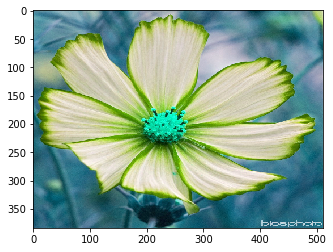

In [12]:
i=0
while i<L:
    j=0
    while j<H :
        (rouge,vert,bleu)=im1.getpixel((i,j))
        im2.putpixel((i,j),(bleu,rouge,vert))
        j=j+1
    i=i+1

imshow(np.array(im2))

La permutation des valeurs des composantes donne un effet saisissant.
On peut comprendre en faisant apparaître les trois images des composantes, comme ci-dessous.

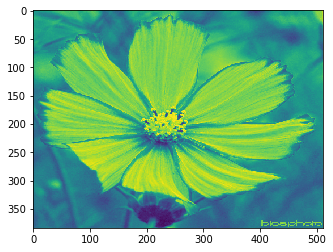

In [13]:
rouge,vert,bleu = im1.split()  # Récupération des différentes composantes de l'image

# rouge.show()
# vert.show()
# bleu.show()


imshow(np.array(rouge)) ## Affichage des différents images composantes


In [14]:
print(np.array(rouge))

[[154 158 158 ... 225 229 244]
 [147 147 147 ... 215 216 227]
 [145 142 137 ... 215 216 228]
 ...
 [ 95  92  92 ... 118 119 125]
 [ 92  94  89 ... 120 119 129]
 [ 89  91  94 ... 115 115 127]]


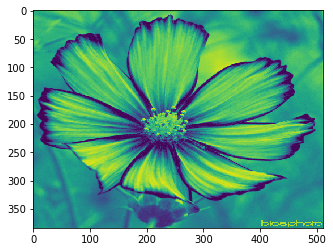

In [15]:
imshow(np.array(vert))

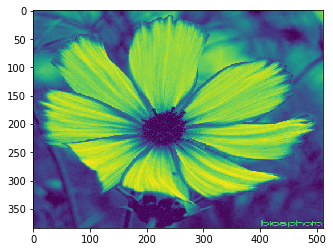

In [16]:
imshow(np.array(bleu))

Avant d'avancer plus loin dans les transformations, notons que vous pouvez à tout moment faire une sauvegarde sous un format et sous un nom souhaités. im2.save('fleur.jpg', "JPEG") ou im2.save('fleur.bmp', "BMP") ou encore im2.save('fleur.png', "PNG").

Petit travail : construire une image constituée de l'image de base et de ces trois composantes.

Présentation de quelques filtres.

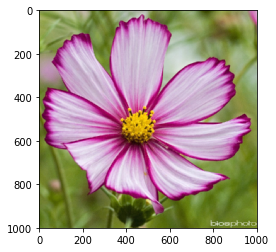

In [12]:
from PIL import ImageFilter
im3 = im1.filter(ImageFilter.BLUR)
# im3.show()
im3.save('fleurFloutee.png',"PNG") 

imshow(np.array(im3))

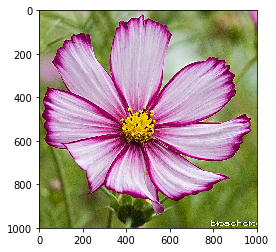

In [13]:
im4 = im1.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))
imshow(np.array(im4))

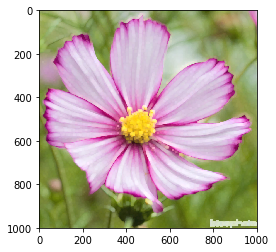

In [16]:
im5 = im1.filter(ImageFilter.MaxFilter(size=9))
imshow(np.array(im5))


<h2> Prolongements : recherche de traitements </h2>

Vous pouvez rechercher sur le web, des traitemetnts divers et variés à mettre en oeuvre. Faire une recherhe sur ImageFilter.
Voici un résultat : https://apprendre-php.com/tutoriels/tutoriel-38-imagefilter-les-effets-spciaux.html
https://hhsprings.bitbucket.io/docs/programming/examples/python/PIL/ImageFilter.html